In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from dataset.distribution import *

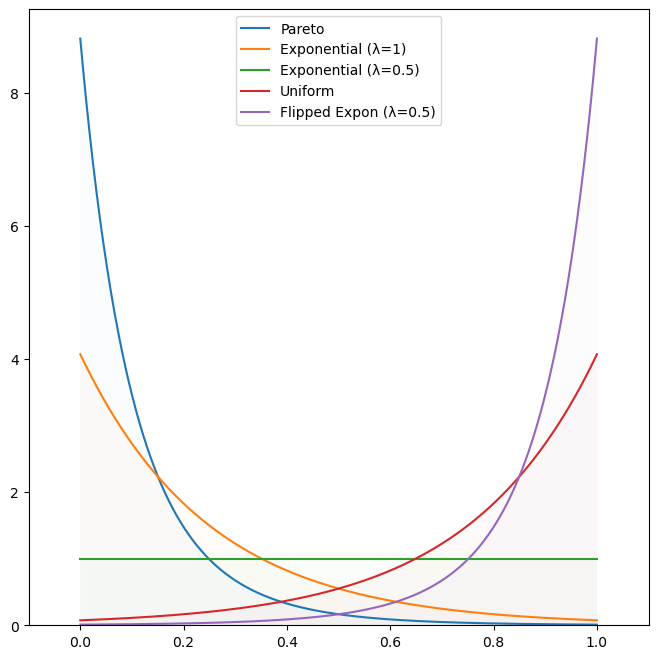

In [110]:
x = np.linspace(0, 1, 1000)

res = [
    TruncPareto(alpha=8.8, flipped=True),
    TruncExponential(4, flipped=True),
    Uniform(0, 1),
    TruncExponential(4),
    TruncPareto(alpha=8.8),
]

labels = [
    "Flipped Pareto (α=8.8)",
    "Flipped Expon (λ=4)",
    "Uniform",
    "Exponential (λ=4)",
    "Pareto (α=8.8)",
]

plt.figure(figsize=(8, 8))
for r, l in zip(reversed(res), reversed(labels)):
    vals = r.pdf()(x)
    plt.plot(x, vals, label=l)
    plt.fill_between(x, vals, alpha=0.02)
plt.ylim([0, None])
plt.xlim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()


In [108]:
x = np.linspace(0, 1, 1000)
#v = TruncPareto(alpha=8.8).pdf()(x)
v = TruncExponential(8).pdf()(x)

print(np.trapz(v[:200], x[:200]))
print(np.trapz(v[200:], x[200:]))

0.7970775467419542
0.201306562633391


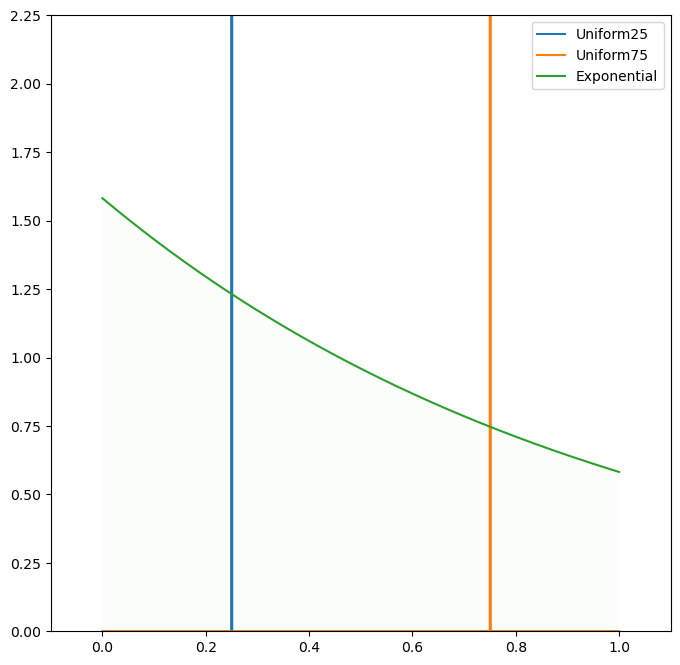

In [58]:
# Coverage
x = np.linspace(0, 1, 1000)

res = [
    TruncExponential(1),
    Uniform(0.75, 0.751),
    Uniform(0.25, 0.251)
]

labels = [
    "Exponential",
    "Uniform75",
    "Uniform25"
]

plt.figure(figsize=(8, 8))
for r, l in zip(reversed(res), reversed(labels)):
    vals = r.pdf()(x)
    plt.plot(x, vals, label=l)
    plt.fill_between(x, vals, alpha=0.02)
plt.ylim([0, 2.25])
plt.xlim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()


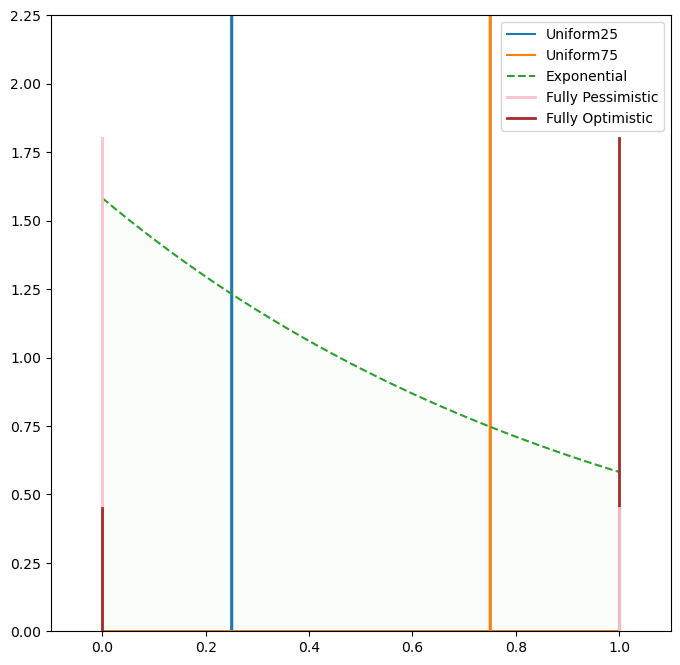

In [76]:
# Ground Truth
x = np.linspace(0, 1, 1000)

res = [
    Uniform(0.75, 0.751),
    Uniform(0.25, 0.251)
]

labels = [
    "Uniform75",
    "Uniform25"
]

plt.figure(figsize=(8, 8))
for r, l in zip(reversed(res), reversed(labels)):
    vals = r.pdf()(x)
    plt.plot(x, vals, label=l)
    plt.fill_between(x, vals, alpha=0.02)
lw = 2

vals = TruncExponential(1).pdf()(x)
plt.plot(x, vals, label="Exponential", ls="dashed")
plt.fill_between(x, vals, alpha=0.02)

plt.axvline(0, 0, 0.8, c="pink", label="Fully Pessimistic", lw=lw)
plt.axvline(1, 0, 0.8, c="brown", lw=lw)
plt.axvline(0, 0, 0.2, c="brown", label="Fully Optimistic", lw=lw)
plt.axvline(1, 0, 0.2, c="pink", lw=lw)
plt.ylim([0, 2.25])
plt.xlim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()
